<a href="https://colab.research.google.com/github/JelenaA14/ml-product-category-predict-project/blob/main/notebook/product_category_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Product Category Prediction**

## 🎯 Project Objective

The main objective of this project is to develop a machine learning model that can automatically predict the appropriate product category basednon the product title.

Specifically, the goals are:
- To preprocess and analyze a real-world e-commerce dataset
- To transform textual data into a numerical features using TF-IDF
- To experiment with additional engineered features
- To train and compare multiple classification models
- To evaluate model performance using standard classification metrics
- To select and save the best-performing model for future use

# 📥 Loading and Inspecting the Dataset

Before performing any analysis or modeling, it is essential to load the dataset and understand its structure.
In this step, we examine the basic properties of the data, including column type, display of the first 5 rows, the number of columns and rows.

In [33]:
import pandas as pd

# Load dataset from GitHub
url = "https://raw.githubusercontent.com/JelenaA14/ml-product-category-predict-project/main/data/products.csv"
df = pd.read_csv(url)

# Print shape (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)

# Display first few rows
print("\nFirs 5 rows:")
display(df.head())

# Basic info about the dataset
print("\nDataset info:")
df.info()


Dataset shape (rows, columns): (35311, 8)

Firs 5 rows:


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product ID       35311 non-null  int64  
 1   Product Title    35139 non-null  object 
 2   Merchant ID      35311 non-null  int64  
 3    Category Label  35267 non-null  object 
 4   _Product Code    35216 non-null  object 
 5   Number_of_Views  35297 non-null  float64
 6   Merchant Rating  35141 non-null  float64
 7    Listing Date    35252 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB


# 🔎 Checking for Missing Values

Before proceeding further, we check the dataset for missing values to ensure data quality and consistency

In [34]:
# Checking for missing values
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


# 🧹 Data Cleaning and Label Standardization

In this step, we prepare the data for model:
- Removed rows with empty
titles or categories
- Converted all titles to lowercase for consistency
- Fixed duplicate categories
- Added title lenght and word count as extra info for the model

In [35]:
# Rename columns for easier usage
df = df[["Product Title", " Category Label"]]
df.columns = ["title", "category"]
print(df.head())

# Remove rows with missing values in critical columns
df.dropna(subset=["title", "category"], inplace=True)
print("Dataset shape after removing missing values:")
print(df.shape)

# Convert product titles to lowercase
df["title"] = df["title"].str.lower()

# Clean and standardize category labels
df["category"] = (df["category"].astype(str).str.strip().str.lower())

# Category normalization
category_mapping = {
    "fridge": "fridges",
    "fridges": "fridges",
    "cpu": "cpus",
    "cpus": "cpus",
    "mobile phone": "mobile phones",
    "mobile phones": "mobile phones"
}

df["category"] = df["category"].replace(category_mapping)
print(df["category"].value_counts())

print("Text preprocessing completed. Sample titles:")
print(df["title"].head())

                                               title       category
0                    apple iphone 8 plus 64gb silver  Mobile Phones
1                apple iphone 8 plus 64 gb spacegrau  Mobile Phones
2  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...  Mobile Phones
3                apple iphone 8 plus 64gb space grey  Mobile Phones
4  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...  Mobile Phones
Dataset shape after removing missing values:
(35096, 2)
category
fridge freezers     5470
mobile phones       4057
washing machines    4015
cpus                3831
fridges             3559
tvs                 3541
dishwashers         3405
digital cameras     2689
microwaves          2328
freezers            2201
Name: count, dtype: int64
Text preprocessing completed. Sample titles:
0                      apple iphone 8 plus 64gb silver
1                  apple iphone 8 plus 64 gb spacegrau
2    apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...
3                  apple iphone 8 plus 64

# 📊 Data Visualization

The distribution of product categories is visualized to gain insight into class
balance within the dataset.

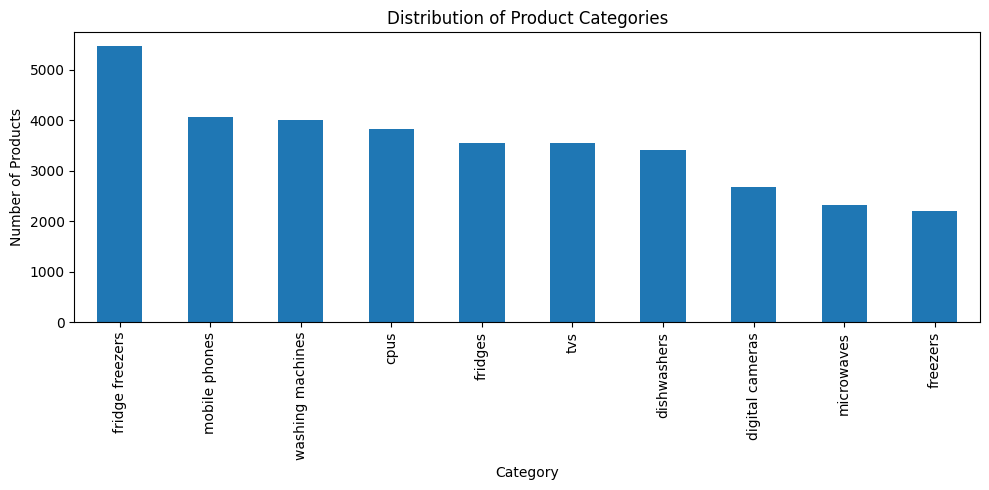

In [36]:
import matplotlib.pyplot as plt

df['category'].value_counts().plot(kind="bar", figsize=(10, 5))
plt.title("Distribution of Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()

# 🛠️ Feature Engineering

In this step, we create additional numerical features from the product titles that may help improve the model's performance.

In [37]:
# Length of the title (number of characters)
df["title_length"] = df["title"].str.len()

# Number of words in the titles
df["word_count"] = df["title"].str.split().str.len()

# Check if the title contains any numbers
df["has_number"] = df["title"].str.contains(r"\d").astype(int)

print("Feature engineering completed. Sample rows:")
print(df.head())

Feature engineering completed. Sample rows:
                                               title       category  \
0                    apple iphone 8 plus 64gb silver  mobile phones   
1                apple iphone 8 plus 64 gb spacegrau  mobile phones   
2  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...  mobile phones   
3                apple iphone 8 plus 64gb space grey  mobile phones   
4  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...  mobile phones   

   title_length  word_count  has_number  
0            31           6           1  
1            35           7           1  
2            70          13           1  
3            35           7           1  
4            54          11           1  


# 🔠 TF-IDF Vectorization

In this step, we transform the product titles into numerical features using the TF-IDF technique.
This allows machine learning models to work with textual data by capturing the importance of words within product titles.

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)

# Fit and transform the product titles
X_tfidf = tfidf.fit_transform(df["title"])

# Target variable
y = df["category"]

print("TF-IDF vectorization completed.")
print("TF-IDF matrix shape", X_tfidf.shape)

TF-IDF vectorization completed.
TF-IDF matrix shape (35096, 5000)


# 📟 Training and Comparing Multiple Machine Learning Models

The dataset is split into training and test sets to evaluate model performance
 on unseen data.
TF-IDF vectorization is applied to product titles, and multiple machine learning models are trained and evaluated using a unified pipeline approach.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


# Features and label
X = df["title"]
y = df["category"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# List of classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": LinearSVC()
}

# Train and evaluate
for name, model in models.items():
  print(f"\n🔎 {name}")

  pipeline = Pipeline([("tfidf", TfidfVectorizer(stop_words="english", max_features=5000)),
                       ("classifier", model)])
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  print(classification_report(y_test, y_pred))


🔎 Logistic Regression
                  precision    recall  f1-score   support

            cpus       1.00      0.99      1.00       766
 digital cameras       0.99      0.99      0.99       538
     dishwashers       0.98      0.92      0.95       681
        freezers       0.98      0.93      0.95       440
 fridge freezers       0.90      0.95      0.92      1094
         fridges       0.90      0.89      0.90       712
      microwaves       0.98      0.96      0.97       466
   mobile phones       0.96      0.99      0.98       812
             tvs       0.98      0.99      0.98       708
washing machines       0.95      0.95      0.95       803

        accuracy                           0.96      7020
       macro avg       0.96      0.96      0.96      7020
    weighted avg       0.96      0.96      0.96      7020


🔎 Naive Bayes
                  precision    recall  f1-score   support

            cpus       1.00      0.99      1.00       766
 digital cameras       0.99   